In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score

**Importing the dataset**

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
label = LabelEncoder()
label.fit(df['Gender'])
df['Gender'] = label.transform(df['Gender'])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [6]:
X = df[['Gender','Age','EstimatedSalary']]
Y = df[['Purchased']]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

**Feature Scaling**

In [8]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Fitting Random Forest to the Training set**

In [10]:
rc = RandomForestClassifier(n_estimators=15)
rc.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(n_estimators=15)

**Predicting the Test set results**

In [11]:
y_pred =  rc.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

**Making the Confusion Matrix**

In [14]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[66,  6],
       [ 5, 43]])

**Visualising the Training set results**

Train data score is : 99.28571428571429


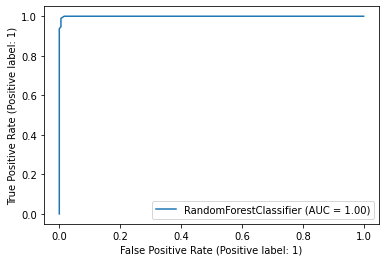

In [23]:
training_score = rc.score(x_train,y_train)*100
print("Train data score is :",training_score)
RocCurveDisplay.from_estimator(rc,x_train,y_train)

**Visualising the Test set results**

Test data score is : 90.83333333333333


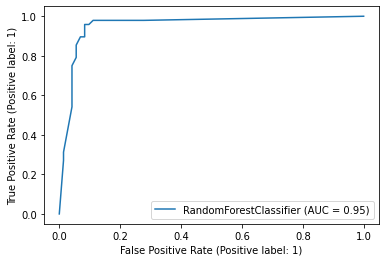

In [27]:
test_score=accuracy_score(y_test,y_pred)*100
print("Test data score is :",test_score)
RocCurveDisplay.from_estimator(rc,x_test,y_test)